# Doing Data Science. NY Times Advertisement Data in May 2012 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://stat.columbia.edu/~rachel/datasets/nyt1.csv')

In [3]:
labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
age_group = pd.cut(df['Age'], np.array([0, 18, 25, 35, 45, 55, 65, 109]), include_lowest=True, right=False, labels=labels)
df['age_group'] = age_group

In [4]:
group =df.groupby(['age_group']).sum()

# 年齢別、男女別のImpressionの比較

In [4]:
df_man = df.where(df['Gender']==1)

In [20]:
group['Imp_man'] = df_man.groupby('age_group').apply(lambda x : x['Impressions'].sum())

In [21]:
group['Imp_wman'] = df.where(df['Gender']==0).groupby('age_group').apply(lambda x:x['Impressions'].sum())

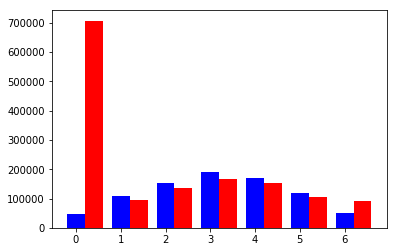

In [24]:
imp_m = group['Imp_man']
imp_w = group['Imp_wman']
idx = np.arange(7)
w = 0.4
plt.bar(idx, imp_m, width=w, color='b', label='Imp_man')
plt.bar(idx+w, imp_w, width=w, color='r', label='Imp_wman')
plt.show()

若者と年寄りだけ女性のImpが多い。。？？理由がようわからん。

# 年齢別、男女別のクリックの比較

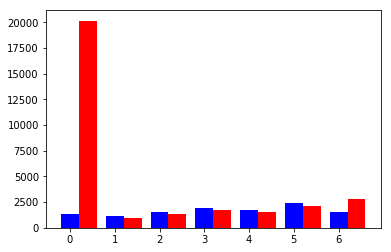

In [6]:
group['Clik_man'] = df.where(df['Gender']==1).groupby('age_group').apply(lambda x:x['Clicks'].sum())
group['Clik_wman'] = df.where(df['Gender']==0).groupby('age_group').apply(lambda x:x['Clicks'].sum())
idx = np.arange(7)
w = 0.4
plt.bar(idx, group['Clik_man'], width=w, color='b', label='Cl_man')
plt.bar(idx+w, group['Clik_wman'], width=w, color='r', label='Cl_wman')
plt.show()

impとだいたいおなじ感じ。